# Graphs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
path="/home/ubuntu/EmbrapiiCPqD/OpenRanDatacenterPlacement/open_ran_datacenter_placement/"
jobs = 100


## Bar Graphs for final ODCs placement for case studies 1 and 2

For Manaus, ODCs initial values are 90, 45, 30, 22


In [3]:
# Initialize variables and DataFrames
#CaseStudy = [1, 2, 3, 4]
CaseStudy=['1-1','1-2','1-3','1-4',
          '2-1','2-2','2-3','2-4']

dfManausCapacitiesStudies = pd.DataFrame()
dfNatalCapacitiesStudies = pd.DataFrame()

dfManausFiberStudies = pd.DataFrame()
dfNatalFiberStudies = pd.DataFrame()

dfManausOdcsStudies = pd.DataFrame()
dfNatalOdcsStudies = pd.DataFrame()

listOdcsManaus=[]
listOdcsNatal=[]

listTotalCapacityManaus = []
listTotalCapacityNatal = []

for icase in CaseStudy:
    dfManausCapacities = pd.DataFrame()
    dfNatalCapacities = pd.DataFrame()
    dfManausFiber = pd.DataFrame()
    dfNatalFiber = pd.DataFrame()
    dfManausOdcs = pd.DataFrame()
    dfNatalOdcs = pd.DataFrame()
    noOdcsManaus = 0
    noOdcsNatal =0
    listCapacityManaus= 0
    listCapacityNatal= 0
    for ijobs in range(jobs):
        # Read the current capacities for Manaus and Natal
        dfManausCurrent_capacities = pd.read_csv(path + "Campaign_ManausCase"+icase+"/data/Job"+str(ijobs+1)+"/df_capacities.csv", usecols=['odc_locations','capacities'])
        dfManausCurrent_capacities = dfManausCurrent_capacities.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"capacities": "capacities_study"+str(icase)})

        dfNatalCurrent_capacities = pd.read_csv(path + "Campaign_NatalCase"+icase+"/data/Job"+str(ijobs+1)+"/df_capacities.csv", usecols=['odc_locations','capacities'])
        dfNatalCurrent_capacities = dfNatalCurrent_capacities.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"capacities": "capacities_study"+str(icase)})

        # Read the current fiber length for Manaus and Natal
        dfManausCurrent_fiber = pd.read_csv(path + "Campaign_ManausCase"+icase+"/data/Job"+str(ijobs+1)+"/df_fiberlength.csv", usecols=['odc_locations','fiberlength'])
        dfManausCurrent_fiber = dfManausCurrent_fiber.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"fiberlength": "fiberlength_study"+str(icase)})
        
        dfNatalCurrent_fiber = pd.read_csv(path + "Campaign_NatalCase"+icase+"/data/Job"+str(ijobs+1)+"/df_fiberlength.csv",usecols=['odc_locations','fiberlength'])
        dfNatalCurrent_fiber = dfNatalCurrent_fiber.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"fiberlength": "fiberlength_study"+str(icase)})
        
        # Read the current ODCs for Manaus and Natal
        dfManausCurrent_odcs = pd.read_csv(path + "Campaign_ManausCase"+icase+"/data/Job"+str(ijobs+1)+"/df_client_association.csv", usecols=['odc_location','oru'])
        dfManausCurrent_odcs = dfManausCurrent_odcs.rename(columns={"odc_location":"odc_locations_study"+str(icase),"oru": "oru_study"+str(icase)})
        
        dfNatalCurrent_odcs = pd.read_csv(path + "Campaign_NatalCase"+icase+"/data/Job"+str(ijobs+1)+"/df_client_association.csv",usecols=['odc_location','oru'])
        dfNatalCurrent_odcs = dfNatalCurrent_odcs.rename(columns={"odc_location":"odc_locations_study"+str(icase),"oru": "oru_study"+str(icase)})
        
        # Calculate the average number of ODCs
        noOdcsManaus = (noOdcsManaus + dfManausCurrent_capacities.shape[0]) / 2
        noOdcsNatal = (noOdcsNatal + dfNatalCurrent_capacities.shape[0]) / 2

        # Calculate total number of CPUs for each city 
        listCapacityManaus = listCapacityManaus + dfManausCurrent_capacities["capacities_study"+str(icase)].sum()
        listCapacityNatal = listCapacityNatal + dfNatalCurrent_capacities["capacities_study"+str(icase)].sum()
        
        # Concatenate the current DataFrames with the overall DataFrames
        dfManausCapacities = pd.concat([dfManausCapacities, dfManausCurrent_capacities], axis=0)
        dfNatalCapacities = pd.concat([dfNatalCapacities, dfNatalCurrent_capacities], axis=0)
        
        dfManausFiber = pd.concat([dfManausFiber, dfManausCurrent_fiber], axis=0)
        dfNatalFiber = pd.concat([dfNatalFiber, dfNatalCurrent_fiber], axis=0)
        
        dfManausOdcs = pd.concat([dfManausOdcs, dfManausCurrent_odcs], axis=0)
        dfNatalOdcs = pd.concat([dfNatalOdcs, dfNatalCurrent_odcs], axis=0)

    listOdcsManaus.append(noOdcsManaus)
    listOdcsNatal.append(noOdcsNatal)

    listTotalCapacityManaus.append(listCapacityManaus/jobs)
    listTotalCapacityNatal.append(listCapacityNatal/jobs)
    
    if icase == 0:
        dfManausCapacities = dfManausCapacities.reset_index(drop=True)
        dfManausCapacitiesStudies = pd.concat([dfManausCapacitiesStudies,dfManausCapacities],axis=0)

        dfNatalCapacities = dfNatalCapacities.reset_index(drop=True)
        dfNatalCapacitiesStudies = pd.concat([dfNatalCapacitiesStudies,dfNatalCapacities],axis=0)

        dfManausFiber = dfManausFiber.reset_index(drop=True)
        dfManausFiberStudies = pd.concat([dfManausFiberStudies,dfManausFiber],axis=0)

        dfNatalFiber = dfNatalFiber.reset_index(drop=True)
        dfNatalFiberStudies = pd.concat([dfNatalFiberStudies,dfNatalFiber],axis=0)
    else:
        dfManausCapacities = dfManausCapacities.reset_index(drop=True)
        dfManausCapacitiesStudies = pd.concat([dfManausCapacitiesStudies,dfManausCapacities],axis=1)
        
        dfNatalCapacities = dfNatalCapacities.reset_index(drop=True)
        dfNatalCapacitiesStudies = pd.concat([dfNatalCapacitiesStudies,dfNatalCapacities],axis=1)

        dfManausFiber = dfManausFiber.reset_index(drop=True)
        dfManausFiberStudies = pd.concat([dfManausFiberStudies,dfManausFiber],axis=1)

        dfNatalFiber = dfNatalFiber.reset_index(drop=True)
        dfNatalFiberStudies = pd.concat([dfNatalFiberStudies,dfNatalFiber],axis=1)



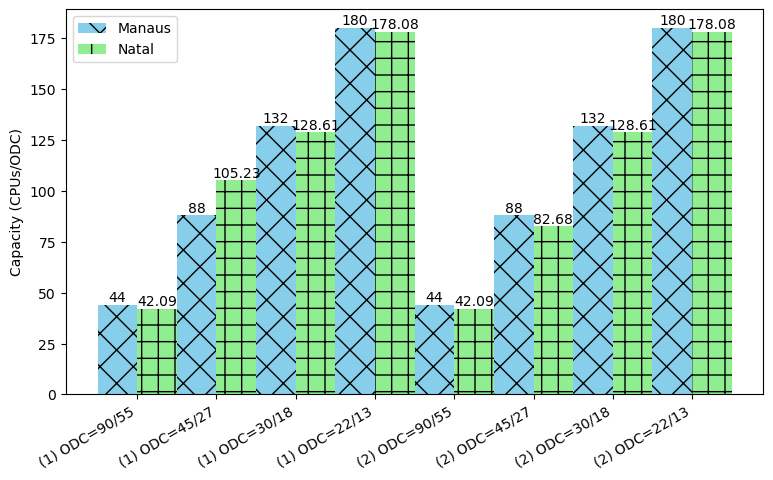

In [4]:
dfManaus = dfManausCapacitiesStudies[['capacities_study1-1','capacities_study1-2','capacities_study1-3','capacities_study1-4',
                                    'capacities_study2-1','capacities_study2-2','capacities_study2-3','capacities_study2-4']]
dfNatal = dfNatalCapacitiesStudies[['capacities_study1-1','capacities_study1-2','capacities_study1-3','capacities_study1-4',
                                    'capacities_study2-1','capacities_study2-2','capacities_study2-3','capacities_study2-4']]

df=pd.concat([dfManaus.mean(),dfNatal.mean()],axis=1)
df = df.rename(columns={0:'Manaus',1:'Natal'})

df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(9,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.5

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['Manaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['Natal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels(['(1) ODC=90/55','(1) ODC=45/27','(1) ODC=30/18','(1) ODC=22/13',
                    '(2) ODC=90/55','(2) ODC=45/27','(2) ODC=30/18','(2) ODC=22/13'], rotation=30, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Capacity (CPUs/ODC)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.show()



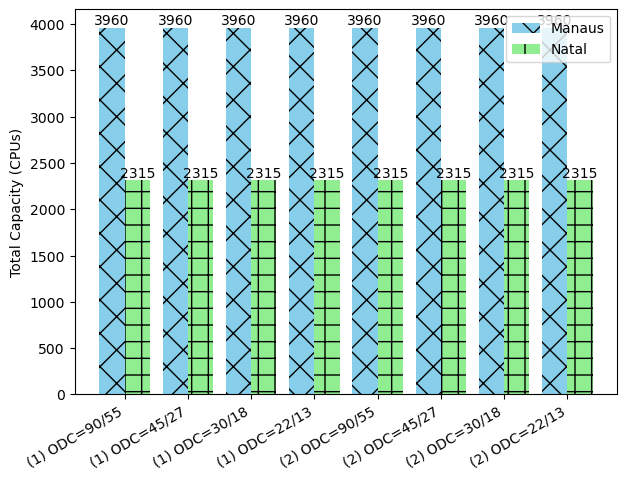

In [5]:
d = {'Manaus': listTotalCapacityManaus[0:8], 'Natal': listTotalCapacityNatal[0:8]}
df = pd.DataFrame(d)

df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['Manaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['Natal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels(['(1) ODC=90/55','(1) ODC=45/27','(1) ODC=30/18','(1) ODC=22/13',
                    '(2) ODC=90/55','(2) ODC=45/27','(2) ODC=30/18','(2) ODC=22/13'], rotation=30, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Total Capacity (CPUs)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.savefig("TotalCapacity.png", dpi=150)
plt.show()

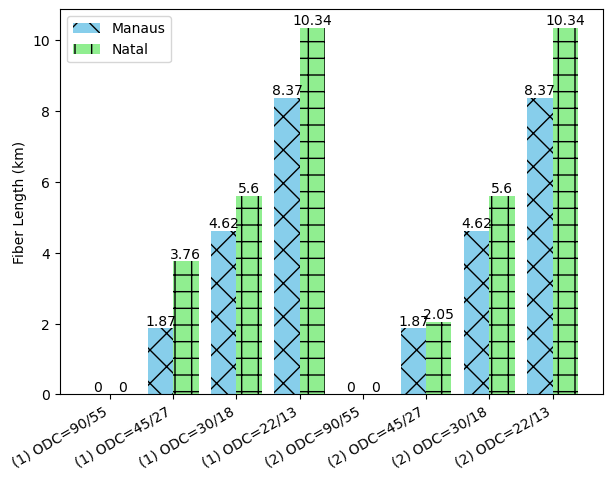

In [6]:
dfManaus = dfManausFiberStudies[['fiberlength_study1-1','fiberlength_study1-2','fiberlength_study1-3','fiberlength_study1-4',
                                'fiberlength_study2-1','fiberlength_study2-2','fiberlength_study2-3','fiberlength_study2-4']]
dfNatal = dfNatalFiberStudies[['fiberlength_study1-1','fiberlength_study1-2','fiberlength_study1-3','fiberlength_study1-4',
                                'fiberlength_study2-1','fiberlength_study2-2','fiberlength_study2-3','fiberlength_study2-4']]

df=pd.concat([dfManaus.mean(),
            dfNatal.mean()],axis=1)
df = df.rename(columns={0:'Manaus',1:'Natal'})

df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['Manaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['Natal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels(['(1) ODC=90/55','(1) ODC=45/27','(1) ODC=30/18','(1) ODC=22/13',
                    '(2) ODC=90/55','(2) ODC=45/27','(2) ODC=30/18','(2) ODC=22/13'], rotation=30, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Fiber Length (km)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.savefig("Fiberlength.png", dpi=150)
plt.show()

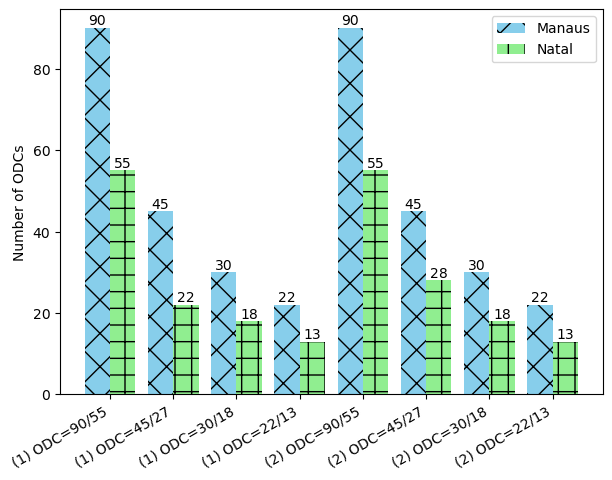

In [7]:
d = {'Manaus': listOdcsManaus[0:8], 'Natal': listOdcsNatal[0:8]}
df = pd.DataFrame(d)

df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['Manaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['Natal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels(['(1) ODC=90/55','(1) ODC=45/27','(1) ODC=30/18','(1) ODC=22/13',
                    '(2) ODC=90/55','(2) ODC=45/27','(2) ODC=30/18','(2) ODC=22/13'], rotation=30, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Number of ODCs')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.show()

## Bar Graphs for final ODCs placement for case studies 3,4

It only makes sense to get this results for 1 Job, once ploting the average means having not an integer as no. of ODCs, which does not happen in real life. Therefore, these set of results belongs only to Job 0.

In [8]:
ijobs=0
CaseStudy=[3,4]
noOdcsManaus = []
noOdcsNatal= []

dfManausCapacities = pd.DataFrame()
dfNatalCapacities = pd.DataFrame()

dfManausFiber = pd.DataFrame()
dfNatalFiber = pd.DataFrame()

dfManausOdcs = pd.DataFrame()
dfNatalOdcs = pd.DataFrame()

nameManaus="Campaign_ManausCase"
nameNatal="Campaign_NatalCase"

for icase in CaseStudy:
    dfManausCurrent_capacities = pd.read_csv(path + nameManaus+str(icase)+"/data/Job"+str(ijobs+1)+ "/df_capacities.csv", usecols=['odc_locations','capacities']) 
    dfManausCurrent_capacities = dfManausCurrent_capacities.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"capacities": "capacities_study"+str(icase)})
    
    dfNatalCurrent_capacities = pd.read_csv(path + nameNatal+str(icase)+"/data/Job"+str(ijobs+1)+ "/df_capacities.csv",usecols=['odc_locations','capacities']) 
    dfNatalCurrent_capacities = dfNatalCurrent_capacities.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"capacities": "capacities_study"+str(icase)})
        
    dfManausCurrent_fiber = pd.read_csv(path + nameManaus+str(icase)+"/data/Job"+str(ijobs+1)+ "/df_fiberlength.csv", usecols=['odc_locations','fiberlength']) 
    dfManausCurrent_fiber = dfManausCurrent_fiber.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"fiberlength": "fiberlength_study"+str(icase)})

    dfNatalCurrent_fiber = pd.read_csv(path + nameNatal+str(icase)+"/data/Job"+str(ijobs+1)+ "/df_fiberlength.csv",usecols=['odc_locations','fiberlength']) 
    dfNatalCurrent_fiber = dfNatalCurrent_fiber.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"fiberlength": "fiberlength_study"+str(icase)})

    dfManausCurrent_odcs = pd.read_csv(path + nameManaus+str(icase)+"/data/Job"+str(ijobs+1)+ "/df_client_association.csv", usecols=['odc_location','oru']) 
    dfManausCurrent_odcs = dfManausCurrent_odcs.rename(columns={"odc_location":"odc_locations_study"+str(icase),"oru": "oru_study"+str(icase)})
    
    dfNatalCurrent_odcs = pd.read_csv(path + nameNatal+str(icase)+"/data/Job"+str(ijobs+1)+ "/df_client_association.csv",usecols=['odc_location','oru']) 
    dfNatalCurrent_odcs = dfNatalCurrent_odcs.rename(columns={"odc_location":"odc_locations_study"+str(icase),"oru": "oru_study"+str(icase)})
    
    dfManausCapacities=pd.concat([dfManausCapacities,dfManausCurrent_capacities],axis=1)
    dfNatalCapacities=pd.concat([dfNatalCapacities,dfNatalCurrent_capacities], axis=1)

    dfManausFiber=pd.concat([dfManausFiber,dfManausCurrent_fiber],axis=1)
    dfNatalFiber=pd.concat([dfNatalFiber,dfNatalCurrent_fiber], axis=1)

    dfManausOdcs=pd.concat([dfManausOdcs,dfManausCurrent_odcs],axis=1)
    dfNatalOdcs=pd.concat([dfNatalOdcs,dfNatalCapacities], axis=1)



### Case Study 3

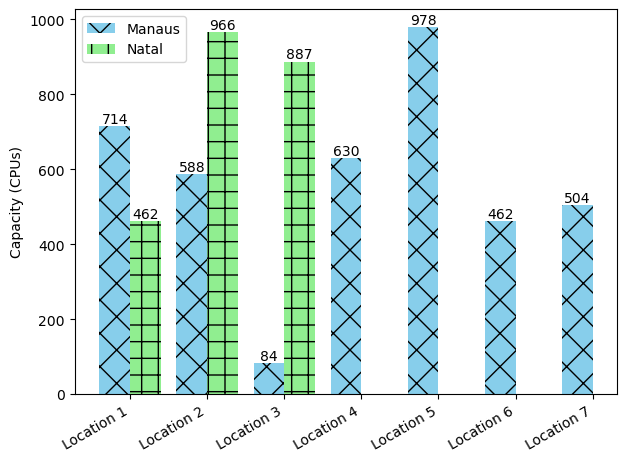

In [9]:
dfManaus = dfManausCapacities.drop(columns=['odc_locations_study3','odc_locations_study4','capacities_study3'])
dfNatal = dfNatalCapacities.drop(columns=['odc_locations_study3','odc_locations_study4','capacities_study3'])

df=pd.concat([dfManaus.rename(columns={'capacities_study4':'CapacidadeManaus'}),
            dfNatal.rename(columns={'capacities_study4':'CapacidadeNatal'})],axis=1)
df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['CapacidadeManaus'], bar_width, color='skyblue', label='Manaus', hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['CapacidadeNatal'], bar_width, color='lightgreen', label='Natal', hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels([f'Location {i+1}' for i in x], rotation=30, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Capacity (CPUs)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.show()

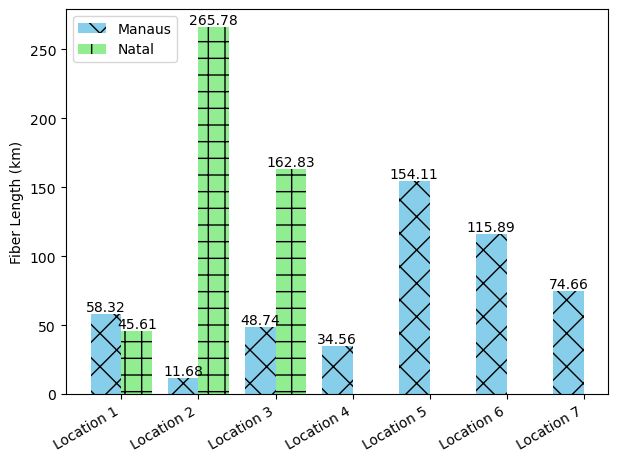

In [5]:
dfManaus = dfManausFiber.drop(columns=['odc_locations_study3','odc_locations_study4','fiberlength_study4'])
dfNatal = dfNatalFiber.drop(columns=['odc_locations_study3','odc_locations_study4','fiberlength_study4'])

df=pd.concat([dfManaus.rename(columns={'fiberlength_study3':'fiberlengthManaus'}),
            dfNatal.rename(columns={'fiberlength_study3':'fiberlengthNatal'})],axis=1)
df = round(df*100)/100


# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['fiberlengthManaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['fiberlengthNatal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels([f'Location {i+1}' for i in x], rotation=30, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Fiber Length (km)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.show()

### Case Study 4

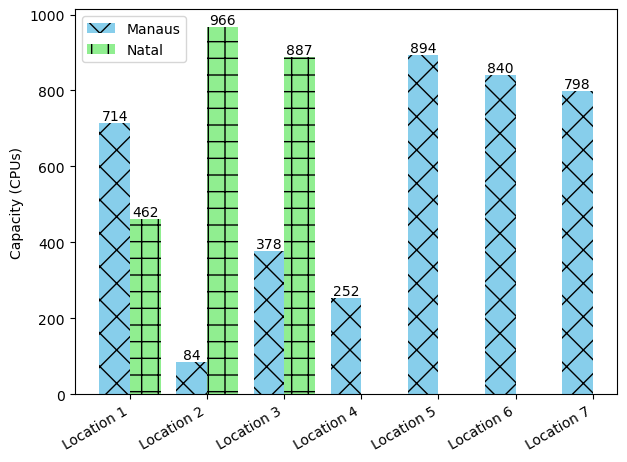

In [6]:
dfManaus = dfManausCapacities.drop(columns=['odc_locations_study3','odc_locations_study4','capacities_study4'])
dfNatal = dfNatalCapacities.drop(columns=['odc_locations_study3','odc_locations_study4','capacities_study4'])

df=pd.concat([dfManaus.rename(columns={'capacities_study3':'CapacidadeManaus'}),
            dfNatal.rename(columns={'capacities_study3':'CapacidadeNatal'})],axis=1)
df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['CapacidadeManaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['CapacidadeNatal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels([f'Location {i+1}' for i in x], rotation=30, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Capacity (CPUs)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.show()

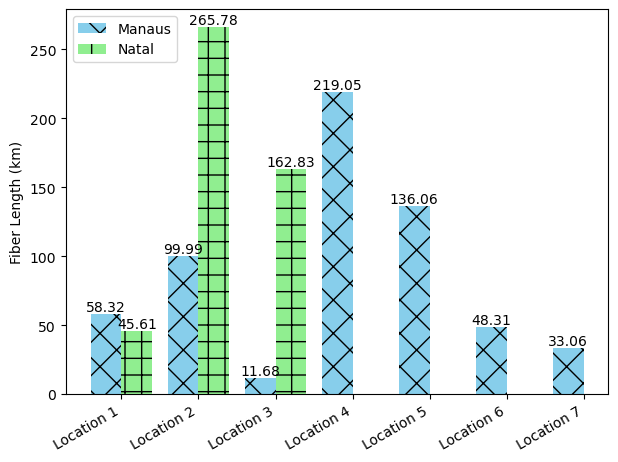

In [7]:
dfManaus = dfManausFiber.drop(columns=['odc_locations_study3','odc_locations_study4','fiberlength_study3'])
dfNatal = dfNatalFiber.drop(columns=['odc_locations_study3','odc_locations_study4','fiberlength_study3'])

df=pd.concat([dfManaus.rename(columns={'fiberlength_study4':'fiberlengthManaus'}),
            dfNatal.rename(columns={'fiberlength_study4':'fiberlengthNatal'})],axis=1)
df = round(df*100)/100


# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['fiberlengthManaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['fiberlengthNatal'], bar_width, color='lightgreen', label='Natal',hatch = '+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels([f'Location {i+1}' for i in x], rotation=30, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Fiber Length (km)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.show()

## Bar Graphs of capacity and fiberlength for each case study

In [8]:
# Initialize variables and DataFrames
CaseStudy = [1, 2, 3, 4]

dfManausCapacitiesStudies = pd.DataFrame()
dfNatalCapacitiesStudies = pd.DataFrame()

dfManausFiberStudies = pd.DataFrame()
dfNatalFiberStudies = pd.DataFrame()

dfManausOdcsStudies = pd.DataFrame()
dfNatalOdcsStudies = pd.DataFrame()

listOdcsManaus=[]
listOdcsNatal=[]


#path = 'your_path_here/'  # Specify your path
#jobs = 10  # Specify the number of jobs

for icase in CaseStudy:
    dfManausCapacities = pd.DataFrame()
    dfNatalCapacities = pd.DataFrame()
    dfManausFiber = pd.DataFrame()
    dfNatalFiber = pd.DataFrame()
    dfManausOdcs = pd.DataFrame()
    dfNatalOdcs = pd.DataFrame()
    noOdcsManaus = 0
    noOdcsNatal =0
    for ijobs in range(jobs):
        # Read the current capacities for Manaus and Natal
        dfManausCurrent_capacities = pd.read_csv(os.path.join(path, f"Campaign_Problema{icase}-Manaus/data/Job{ijobs+1}/df_capacities.csv"), usecols=['odc_locations', 'capacities'])
        dfManausCurrent_capacities = dfManausCurrent_capacities.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"capacities": "capacities_study"+str(icase)})

        dfNatalCurrent_capacities = pd.read_csv(os.path.join(path, f"Campaign_Problema{icase}-Natal/data/Job{ijobs+1}/df_capacities.csv"), usecols=['odc_locations', 'capacities'])
        dfNatalCurrent_capacities = dfNatalCurrent_capacities.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"capacities": "capacities_study"+str(icase)})

        # Read the current fiber length for Manaus and Natal
        dfManausCurrent_fiber = pd.read_csv(os.path.join(path, f"Campaign_Problema{icase}-Manaus/data/Job{ijobs+1}/df_fiberlength.csv"), usecols=['odc_locations', 'fiberlength'])
        dfManausCurrent_fiber = dfManausCurrent_fiber.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"fiberlength": "fiberlength_study"+str(icase)})
        
        dfNatalCurrent_fiber = pd.read_csv(os.path.join(path, f"Campaign_Problema{icase}-Natal/data/Job{ijobs+1}/df_fiberlength.csv"), usecols=['odc_locations', 'fiberlength'])
        dfNatalCurrent_fiber = dfNatalCurrent_fiber.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"fiberlength": "fiberlength_study"+str(icase)})
        
        # Read the current ODCs for Manaus and Natal
        dfManausCurrent_odcs = pd.read_csv(os.path.join(path, f"Campaign_Problema{icase}-Manaus/data/Job{ijobs+1}/df_client_association.csv"), usecols=['odc_location', 'oru'])
        dfManausCurrent_odcs = dfManausCurrent_odcs.rename(columns={"odc_location":"odc_locations_study"+str(icase),"oru": "oru_study"+str(icase)})
        
        dfNatalCurrent_odcs = pd.read_csv(os.path.join(path, f"Campaign_Problema{icase}-Natal/data/Job{ijobs+1}/df_client_association.csv"), usecols=['odc_location', 'oru'])
        dfNatalCurrent_odcs = dfNatalCurrent_odcs.rename(columns={"odc_location":"odc_locations_study"+str(icase),"oru": "oru_study"+str(icase)})
        
        # Calculate the average number of ODCs
        noOdcsManaus = (noOdcsManaus + dfManausCurrent_capacities.shape[0]) / 2
        noOdcsNatal = (noOdcsNatal + dfNatalCurrent_capacities.shape[0]) / 2
        
        # Concatenate the current DataFrames with the overall DataFrames
        dfManausCapacities = pd.concat([dfManausCapacities, dfManausCurrent_capacities], axis=0)
        dfNatalCapacities = pd.concat([dfNatalCapacities, dfNatalCurrent_capacities], axis=0)
        
        dfManausFiber = pd.concat([dfManausFiber, dfManausCurrent_fiber], axis=0)
        dfNatalFiber = pd.concat([dfNatalFiber, dfNatalCurrent_fiber], axis=0)
        
        dfManausOdcs = pd.concat([dfManausOdcs, dfManausCurrent_odcs], axis=0)
        dfNatalOdcs = pd.concat([dfNatalOdcs, dfNatalCurrent_odcs], axis=0)

    listOdcsManaus.append(noOdcsManaus)
    listOdcsNatal.append(noOdcsNatal)
    
    if icase == 0:
        dfManausCapacities = dfManausCapacities.reset_index(drop=True)
        dfManausCapacitiesStudies = pd.concat([dfManausCapacitiesStudies,dfManausCapacities],axis=0)
        
        dfNatalCapacities = dfNatalCapacities.reset_index(drop=True)
        dfNatalCapacitiesStudies = pd.concat([dfNatalCapacitiesStudies,dfNatalCapacities],axis=0)

        dfManausFiber = dfManausFiber.reset_index(drop=True)
        dfManausFiberStudies = pd.concat([dfManausFiberStudies,dfManausFiber],axis=0)

        dfNatalFiber = dfNatalFiber.reset_index(drop=True)
        dfNatalFiberStudies = pd.concat([dfNatalFiberStudies,dfNatalFiber],axis=0)
    else:
        dfManausCapacities = dfManausCapacities.reset_index(drop=True)
        dfManausCapacitiesStudies = pd.concat([dfManausCapacitiesStudies,dfManausCapacities],axis=1)
        
        dfNatalCapacities = dfNatalCapacities.reset_index(drop=True)
        dfNatalCapacitiesStudies = pd.concat([dfNatalCapacitiesStudies,dfNatalCapacities],axis=1)

        dfManausFiber = dfManausFiber.reset_index(drop=True)
        dfManausFiberStudies = pd.concat([dfManausFiberStudies,dfManausFiber],axis=1)

        dfNatalFiber = dfNatalFiber.reset_index(drop=True)
        dfNatalFiberStudies = pd.concat([dfNatalFiberStudies,dfNatalFiber],axis=1)



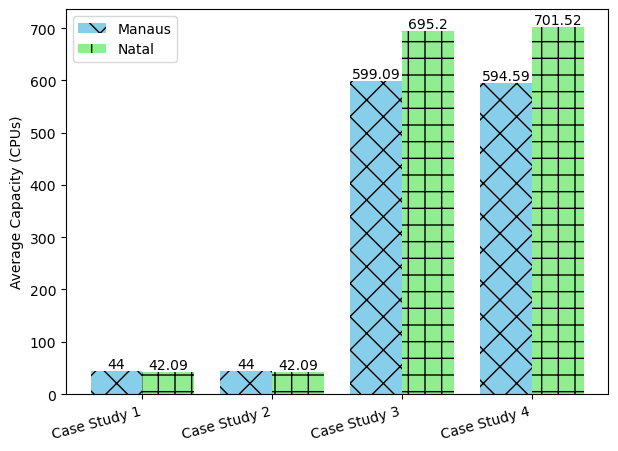

In [9]:
dfManaus = dfManausCapacitiesStudies.drop(columns=['odc_locations_study1','odc_locations_study2','odc_locations_study3','odc_locations_study4'])
dfNatal = dfNatalCapacitiesStudies.drop(columns=['odc_locations_study1','odc_locations_study2','odc_locations_study3','odc_locations_study4'])

df=pd.concat([dfManaus.mean(),
            dfNatal.mean()],axis=1)
df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df[0], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df[1], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels([f'Case Study {i+1}' for i in x], rotation=15, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Average Capacity (CPUs)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.show()

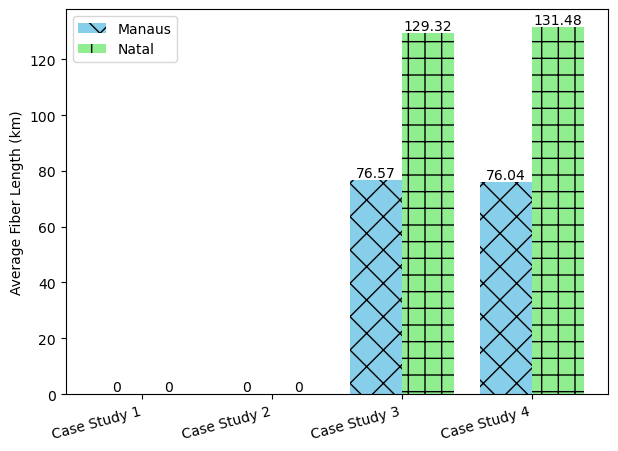

In [10]:
dfManaus = dfManausFiberStudies.drop(columns=['odc_locations_study1','odc_locations_study2','odc_locations_study3','odc_locations_study4'])
dfNatal = dfNatalFiberStudies.drop(columns=['odc_locations_study1','odc_locations_study2','odc_locations_study3','odc_locations_study4'])

df=pd.concat([dfManaus.mean(),
            dfNatal.mean()],axis=1)
df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df[0], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df[1], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels([f'Case Study {i+1}' for i in x], rotation=15, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Average Fiber Length (km)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.show()

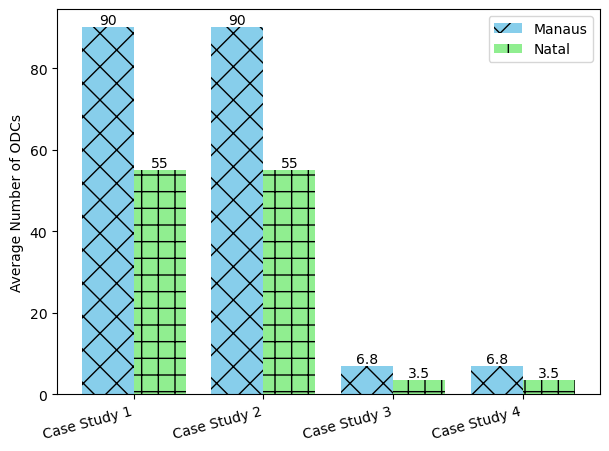

In [11]:
df=pd.DataFrame(data={'manaus':listOdcsManaus, 'natal':listOdcsNatal })
df = round(df*10)/10

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['manaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['natal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels([f'Case Study {i+1}' for i in x], rotation=15
                   , ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Average Number of ODCs')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.show()



In [12]:
listOdcsManaus

[90.0, 90.0, 6.810066592755087, 6.805368937645726]